## COSC102 Topic 1 - Nearest Neighbors Classification Demo

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class by using a 'mesh' 
(a grid of points) on a matplotlib figure.

First we will import Python libraries that we need to access the data, create plots and run the nearest-neighbours machine learning algorithm.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

This a parameter for the KNN algorithm - we can play with this to achieve different results.

In [21]:
n_neighbors = 10

Here we import some data to play with - the iris dataset.

In [22]:
iris = datasets.load_iris()

This specifies the data columns from the iris dataset that we will use. We must select exactly 2 columns for this script to work.

* Here, you can alter the columns (0-3) to use.
* Try ```features_to_use = [2,3]```


In [23]:
features_to_use =[0,1]

This specifies the how the algorithm uses the distances between the points to classify points.

In [24]:
weights = ['uniform', 'distance']

We only take the first two features. We could avoid this ugly slicing by using a two-dim dataset. The measurements sit within the 'data' attribute of the 'iris' object.

The species names sit in the 'target' attribute of the 'iris' object. We can change the columns that we are using by updating the indexes Try [:, 2:4:]

In [25]:
X = iris.data[:, features_to_use]
y = iris.target

Set the step size in the 'mesh' that will be used to demonstrate the boundaries.

In [26]:
h = .02 

Create color maps for the plot.

In [27]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

We create an instance of Neighbours Classifier and fit the data.

In [28]:
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights[0])
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max] * [y_min, y_max].

In [29]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Here we use our algoithm to classify each point the 'mesh' that will be used to demonstrate the decision boundaries

In [30]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Put the result into a color plot.

In [31]:
Z = Z.reshape(xx.shape)

Create a figure to plot the results.

Plot also the training points to see where they sit

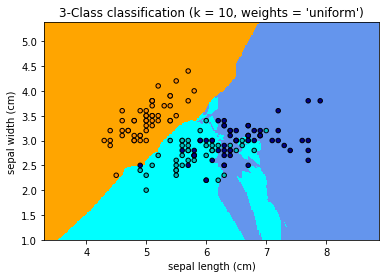

In [32]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points to see where they sit
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Set the title of the plot
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights[0]))

# Set the labels on the plot
plt.xlabel(iris.feature_names[features_to_use[0]])
plt.ylabel(iris.feature_names[features_to_use[1]])

plt.show()